In [2]:
import numpy as np
import pandas as pd

In [3]:
orders = pd.read_csv('data/Orders.csv')
returns = pd.read_csv('data/Returns.csv')

# Part 1 Question 1

In [5]:
orders.Profit = orders.Profit.apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(float)
orders.Sales = orders.Sales.apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(',','')).astype(float)


In [8]:
orders['Month'] = orders['Order.Date'].apply(lambda x: x.split('/')[0]).astype(int)

In [9]:
monthly = orders.groupby(['Month']).agg({'Quantity':'sum'}).sort_values('Month')

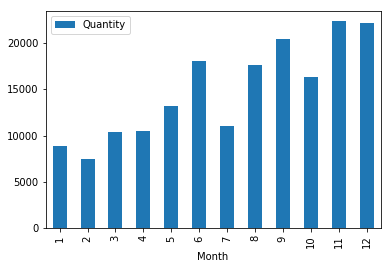

In [12]:
monthly.plot.bar()

In [16]:
x = orders.groupby(['Month','Category']).agg({'Quantity':'sum'}).sort_values('Month').unstack()

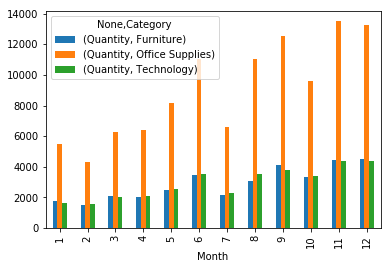

In [17]:
x.plot.bar()

In [28]:
joined = orders.merge(returns,how='inner',left_on='Order.ID',right_on='Order ID')

In [32]:
joined['Year']=joined['Order.Date'].apply(lambda x: x.split('/')[2]).astype(int)

In [34]:
joined.groupby('Year').agg({'Profit':'sum'})

,Profit
Year,
12,17477.26
13,9269.89
14,17510.63
15,17112.97


In [51]:
joined.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region_x', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'Month', 'Returned',
       'Order ID', 'Region_y', 'Year'],
      dtype='object')

In [46]:
returned = joined.groupby(['Customer.ID']).agg('count')[['Order.ID']].sort_values('Order.ID',ascending=False)

In [49]:
print(len(returned[returned['Order.ID']>2]))
print(len(returned[returned['Order.ID']>5]))


294
46


In [70]:
region_orders = orders.groupby('Region').agg('count')[['Order.ID']].sort_values('Order.ID',ascending=False).reset_index()

In [69]:
region_returns = joined.groupby('Region_x').agg('count')[['Order.ID']].sort_values('Order.ID',ascending=False).reset_index()

In [75]:
region_prob_return = region_returns.merge(region_orders,how='inner',left_on='Region_x',right_on='Region').drop('Region',axis=1)


In [76]:
region_prob_return

,Region_x,Order.ID_x,Order.ID_y
0,Central America,248,5616
1,Western Europe,233,5883
2,Western US,177,3203
3,Oceania,154,3487
4,Southeastern Asia,140,3129
5,Eastern US,134,2848
6,South America,133,2988
7,Eastern Asia,131,2374
8,Southern Europe,112,2113
9,Southern Asia,111,2655


In [77]:
region_prob_return['probability'] = region_prob_return['Order.ID_x']/region_prob_return['Order.ID_y']

In [81]:
region_prob_return = region_prob_return.rename(columns = {'Region_x':'Region','Order.ID_x':'Returns','Order.ID_y':'Orders'})


In [84]:
region_prob_return.sort_values('probability',ascending=False)

,Region,Returns,Orders,probability
2,Western US,177,3203,0.055261
7,Eastern Asia,131,2374,0.055181
8,Southern Europe,112,2113,0.053005
18,Southern Africa,25,478,0.052301
11,Southern US,83,1620,0.051235
5,Eastern US,134,2848,0.047051
4,Southeastern Asia,140,3129,0.044743
6,South America,133,2988,0.044511
10,Western Asia,108,2440,0.044262
3,Oceania,154,3487,0.044164


In [62]:
joined.groupby(['Category']).agg('count')[['Order.ID']].sort_values('Order.ID',ascending=False)

,Order.ID
Category,
Office Supplies,1348
Technology,445
Furniture,427


In [85]:
joined.groupby(['Sub.Category']).agg('count')[['Order.ID']].sort_values('Order.ID',ascending=False)

,Order.ID
Sub.Category,
Binders,269
Art,217
Storage,212
Paper,150
Chairs,147
Phones,145
Accessories,138
Labels,137
Furnishings,135


In [88]:
cat_orders = orders.groupby('Sub.Category').agg('count')[['Order.ID']].sort_values('Order.ID',ascending=False).reset_index()
cat_return = joined.groupby('Sub.Category').agg('count')[['Order.ID']].sort_values('Order.ID',ascending=False).reset_index()
cat_prob_return = cat_return.merge(cat_orders,how='inner',on='Sub.Category')


In [91]:
cat_prob_return['probability'] = cat_prob_return['Order.ID_x']/cat_prob_return['Order.ID_y']
cat_prob_return = cat_prob_return.rename(columns = {'Order.ID_x':'Returned','Order.ID_y':'Ordered'})



KeyError: 'Order.ID_x'

In [94]:
cat_prob_return.sort_values('probability',ascending=False)

,Sub.Category,Returned,Ordered,probability
7,Labels,137,2601,0.052672
16,Tables,41,861,0.047619
6,Accessories,138,3075,0.044878
1,Art,217,4864,0.044613
13,Copiers,99,2223,0.044534
0,Binders,269,6146,0.043768
5,Phones,145,3357,0.043193
9,Bookcases,104,2411,0.043136
3,Paper,150,3492,0.042955
4,Chairs,147,3434,0.042807
